# Testing generation of random points on a sphere and spherical cap

**Scott Prahl**

**Feb 2924**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import iadpython

%config InlineBackend.figure_format='retina'

In [2]:
def draw_circle(radius=1, color='blue'):
    theta = np.linspace(0, 2 * np.pi, 100)  
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=color, lw=0.5)

def draw_sphere(ax, sphere_radius=1, color='gray'):
    phi = np.linspace(0, np.pi, 30)   # polar angle
    theta = np.linspace(0, 2 * np.pi, 30)  # azimuthal angle
    phi, theta = np.meshgrid(phi, theta)
    
    # Convert spherical coordinates to Cartesian coordinates for the sphere's surface
    x = sphere_radius * np.sin(phi) * np.cos(theta)
    y = sphere_radius * np.sin(phi) * np.sin(theta)
    z = sphere_radius * np.cos(phi)
    
    # Plot the wireframe
    ax.plot_wireframe(x, y, z, color=color, lw=0.5)

## Check sagitta calculation

Sphere
        diameter =  100.00 mm
          radius =   50.00 mm
   relative area =  0.9583
       uru walls =    99.0%
    uru standard =    99.0%
          baffle = False
Sample Port
        diameter =   40.00 mm
          radius =   20.00 mm
           chord =   20.43 mm
         sagitta =    4.17 mm
          center = (   0.0,    0.0,  -50.0) mm
   relative area =  0.0417
             uru =  0.0000
Detector Port
        diameter =    0.00 mm
          radius =    0.00 mm
           chord =    0.00 mm
         sagitta =    0.00 mm
          center = (  50.0,    0.0,    0.0) mm
   relative area =  0.0000
             uru =  0.0000
Empty Port
        diameter =    0.00 mm
          radius =    0.00 mm
           chord =    0.00 mm
         sagitta =    0.00 mm
          center = (   0.0,    0.0,   50.0) mm
   relative area =  0.0000
             uru =  0.0000
Multipliers
        nothing =   0.000
       standard =  94.867



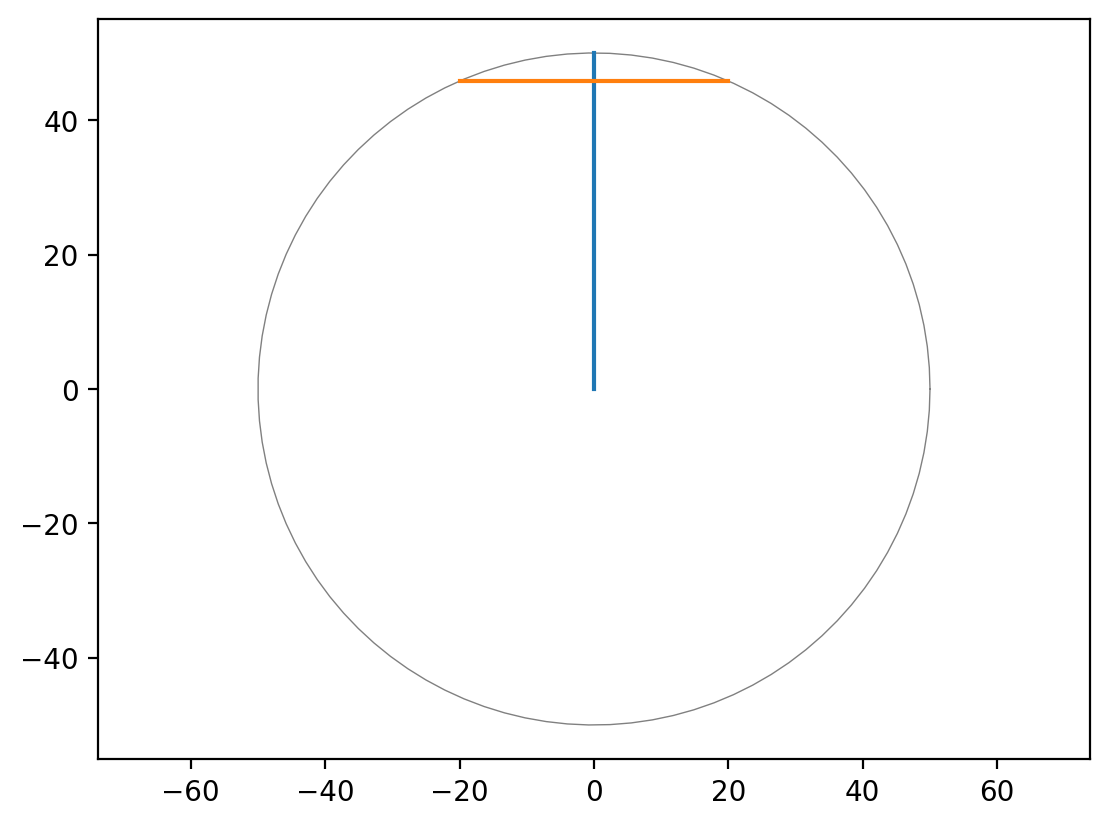

In [3]:
radius = 50
d_sample = 40
sphere = iadpython.Sphere(2*radius, d_sample)
print(sphere)

s = sphere.sample.sagitta

draw_circle(radius, 'gray')
plt.plot([0,0],[0,radius])
plt.plot([-d_sample/2, d_sample/2],[radius-s, radius-s])
plt.axis('equal')
plt.show()

## Visually test the generation of points on a spherical surface

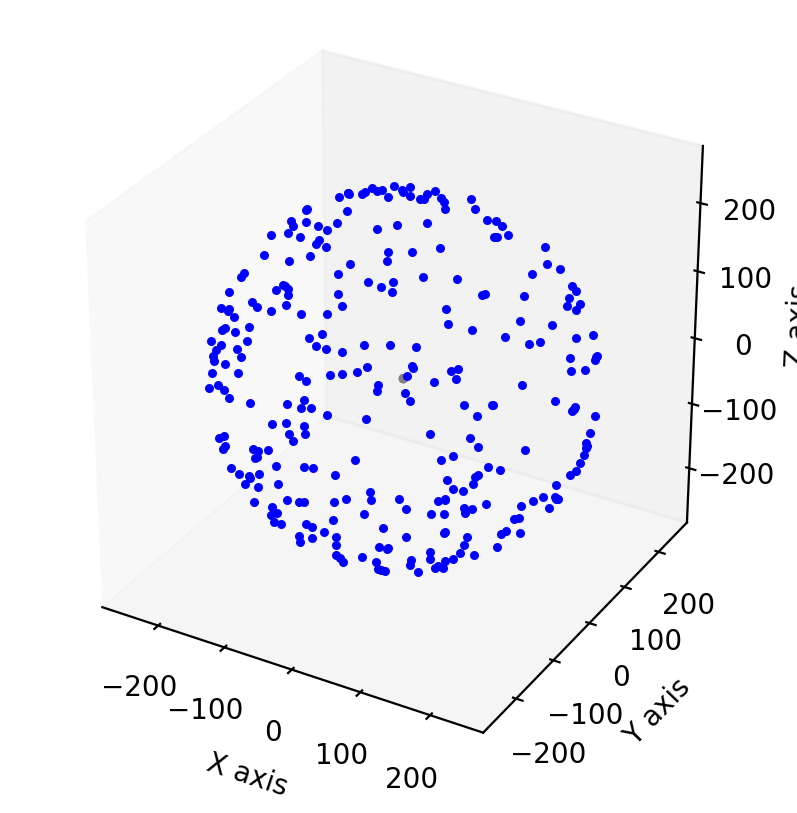

In [7]:
sphere_radius = 5
d_sample = 1
sphere = iadpython.Sphere(2*radius, d_sample)

plt.figure()
ax = plt.axes(projection='3d')
draw_sphere(ax, sphere_radius, 'gray')

for i in range(300):
    x, y, z = sphere.uniform() * 5
    ax.scatter(x, y, z, color='blue', s=5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_box_aspect([1,1,1])  
ax.grid(False)
plt.show()

## Visually test the generation of points on a spherical cap

First, the unit sphere

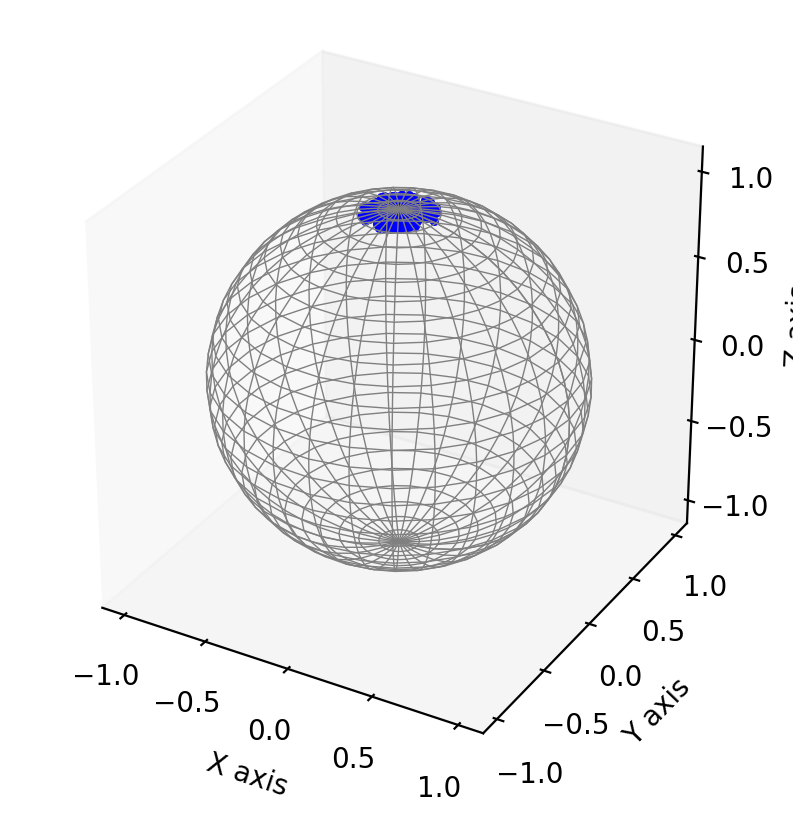

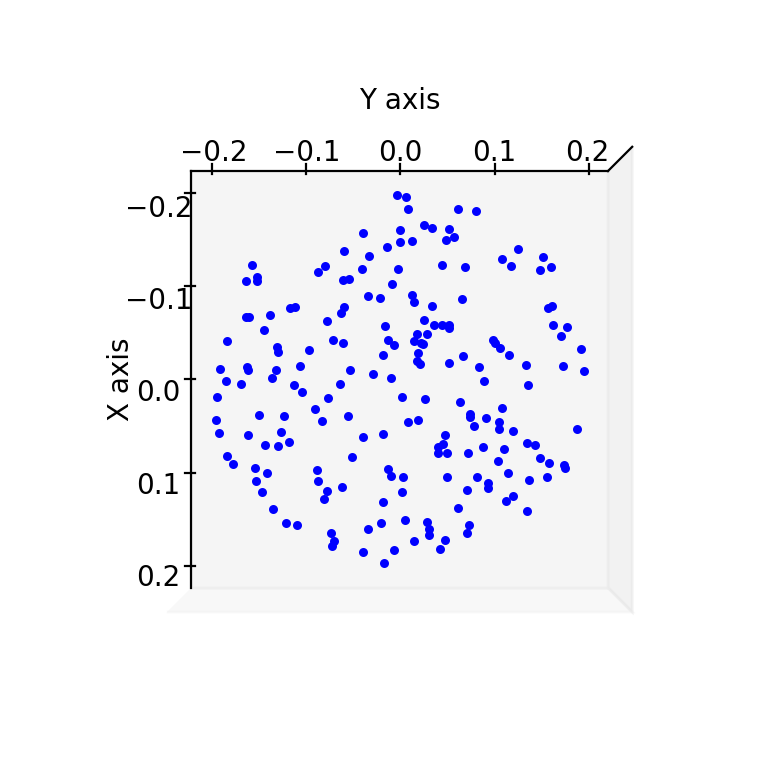

In [11]:
sphere_radius = 1
port_diameter = 0.4
s = iadpython.Sphere(2 * sphere_radius, port_diameter)

h = s.sample.sagitta
plt.figure()
ax = plt.axes(projection='3d')
draw_sphere(ax, sphere_radius)

for i in range(200):
    x, y, z = s.sample.uniform()
    ax.scatter(x, y, z, color='blue',s=5)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_box_aspect([1,1,1])
ax.grid(False)
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=90, azim=0)  # or azim=180

for i in range(200):
    x, y, z = s.sample.uniform()
    ax.scatter(x, y, z, s=5, color='blue')

# Setting the labels for each axis
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('')
ax.set_box_aspect([1,1,1])
ax.grid(False)
ax.zaxis.set_ticklabels([])
ax.zaxis.set_ticks([])
plt.show()

Now a larger sphere

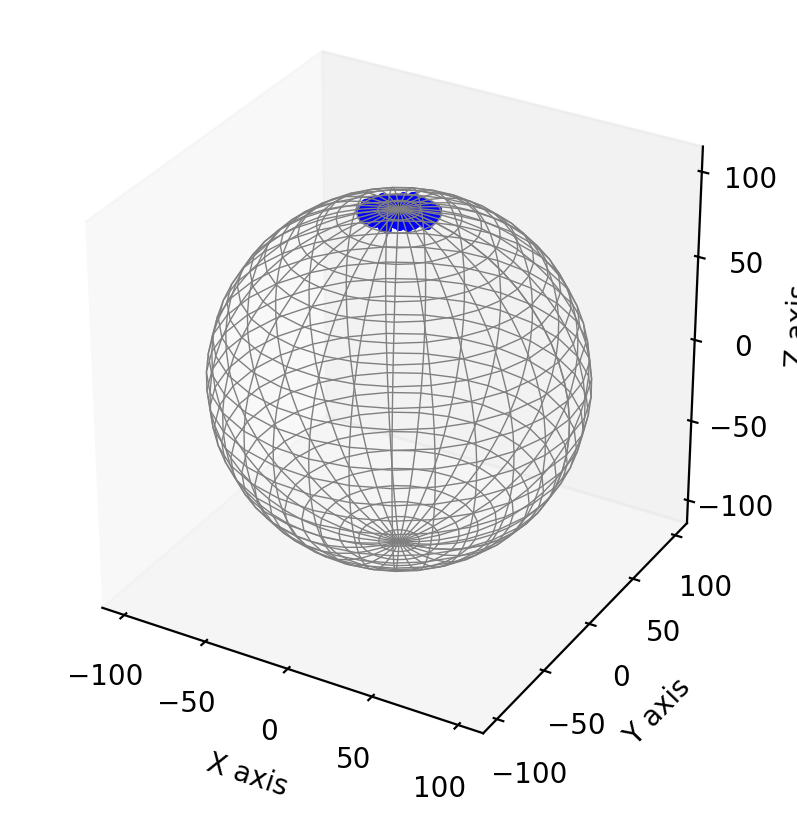

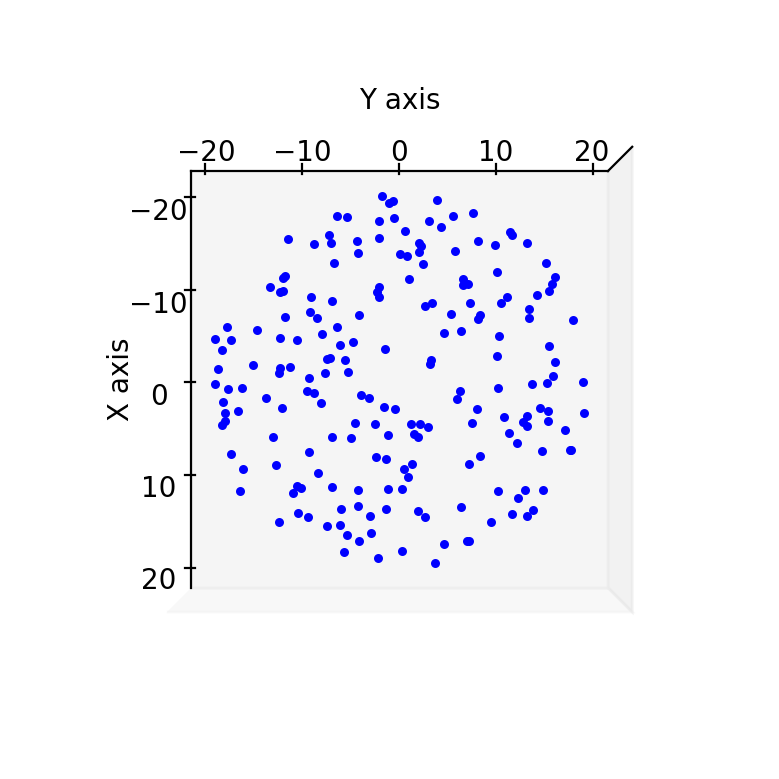

In [14]:
sphere_radius = 100
port_diameter = 40
s = iadpython.Sphere(2 * sphere_radius, port_diameter)
h = s.sample.sagitta

plt.figure()
ax = plt.axes(projection='3d')
draw_sphere(ax, sphere_radius)

for i in range(200):
    x, y, z = s.sample.uniform()
    ax.scatter(x, y, z, color='blue',s=5)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_box_aspect([1,1,1])
ax.grid(False)
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=90, azim=0)  # or azim=180

for i in range(200):
    x, y, z = s.sample.uniform()
    ax.scatter(x, y, z, s=5, color='blue')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('')
ax.set_box_aspect([1,1,1])
ax.grid(False)
ax.zaxis.set_ticklabels([])
ax.zaxis.set_ticks([])
plt.show()

## Rotate random point on cap properly

Some work remains to rotate the top cap so that its center conicides with the designated center of the cap.  I am setting this aside because it is not needed.